# Multidimensional minimization

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [4]:
#-auxiliary-functions-and-1d-methods-
def central2(f, x, h, direction):
    if (direction == 'x'):
        return (f([x[0] + h, x[1]]) - f([x[0] - h, x[1]])) / (2.0 * h)
    elif (direction == 'y'):
        return (f([x[0], x[1] + h]) - f([x[0], x[1] - h])) / (2.0 * h)
    else:
        print('Incerrect direction!')
        return 0

def left(f, x, h):
    if (direction == 'x'):
        return (f(x[0], x[1]) - f(x[0] - h, x[1])) / h
    elif (direction == 'y'):
        return (f(x[0], x[1]) - f(x[0], x[1] - h)) / h
    else:
        print('Incerrect direction!')
        return 0

def calc_grad(f, x, h, diff_method):
    return [diff_method(f, x, h, 'x'), diff_method(f, x, h, 'y')]
    
def calc_l2_norm(x):
    l2 = 0
    for i in range(len(x)):
        l2 += abs(x[i]) ** 2
    return np.sqrt(l2)

def calc_dist(a, b):
    dist = 0;
    for i in range(len(a)):
        dist = dist + (a[i] - b[i]) ** 2
    return np.sqrt(dist)

def Dichotomy(f, a, b, eps):
    delta = eps
    eps_n = (b - a) / 2    
    
    count_calculate = 0
    count_iteration = 0
    
    while (eps_n > eps):
        x1    = (b + a - delta) / 2
        x2    = (b + a + delta) / 2
        count_calculate += 2
        count_iteration += 1
        if (f(x1) <= f(x2)):
            b = x2
            eps_n = (b - a) / 2
        else:
            a = x1
            eps_n = (b - a) / 2
    
    return (b + a) / 2, f((b + a) / 2), count_iteration, count_calculate

def BitwiseSearch(f, a, b, eps):
    count_calculate = 1
    count_iteration = 0
    
    d = (b - a) / 4.0
    x_min = a
    f_min = f(a)
    
    while ((abs(d) > eps)):
        count_iteration += 1
        if (f_min > f(x_min + d)):
            count_calculate += 1
            f_min = f(x_min + d)
            x_min = x_min + d
        else:
            d = - d / 4.0
            
#     print("Понадобилось вычислений: " + str(count_calculate))
#     print("Метод сошелся за: " + str(count_iteration))
            
    return x_min, f_min, count_calculate, count_iteration

### Gradient two-layer algorithms
1. gradient descent method (numeric and analitic versoin)
2. method of the-steepest descent (numeric and analitic versoin)

In [5]:
#-gradient-descent-method-
def analit_grad_descent(f, df, alpha, eps, x0):
    #----------------
    count_i = 0
    count_c = 0
    #----------------
    x  = x0
    fx = f(x0)
    grad_f = np.array(df(x0))
    #----------------
    count_i += 1
    count_c += 2
    #----------------
    
    while (calc_l2_norm(grad_f) >= eps):
        y = x - alpha * grad_f
        fy = f(y)
        grad_f = np.array(df(y))
         #----------------
        count_i += 1
        count_c += 2
        #----------------
        
        if(fy < fx):
            x  = y
            fx = fy
        else:
            alpha = alpha / 2
        
        if (count_i >= 10 ** 6):
            break
    
    return x, fx, count_i, count_c


#-method-of-the-steepest-descent-
def analit_steepest_descent(f, df, eps, x0, eps_1D):
    #----------------
    count_i = 0
    count_c = 0
    #----------------
    x  = x0
    fx = f(x0)
    grad_f = np.array(df(x0))
    #----------------
    count_i += 1
    count_c += 1
    #----------------
    
    while (calc_l2_norm(grad_f) >= eps):
        alpha, _a, subcalc_i, subcalc_c = Dichotomy(lambda alpha: f(x - alpha * grad_f), 0, 1, eps_1D)
        #----------------
        count_i += subcalc_i
        count_c += subcalc_c
        #----------------
        x = x - alpha * grad_f
        fx = f(x)
        grad_f = np.array(df(x))
        #----------------
        count_i += 1
        count_c += 2
        #----------------
        if (count_i >= 10 ** 6):
            break
    
    return x, fx, count_i, count_c


def numeric_steepest_descent(f, eps, x0, eps_1D):
    #----------------
    count_i = 0
    count_c = 0
    #----------------
    x  = x0
    fx = f(x0)
    grad_f = np.array(calc_grad(f, x0, 10**(-2), central2))
    #----------------
    count_i += 1
    count_c += 5
    #----------------
    
    while (calc_l2_norm(grad_f) >= eps):
        alpha, _a, subcalc_i, subcalc_c = Dichotomy(lambda alpha: f(x - alpha * grad_f), 0, 1, eps_1D)
        #----------------
        count_i += subcalc_i
        count_c += subcalc_c
        #----------------
        x = x - alpha * grad_f
        fx = f(x)
        grad_f = np.array(calc_grad(f, x, 10**(-2), central2))
        #----------------
        count_i += 1
        count_c += 4
        #----------------
        if (count_i >= 10 ** 6):
            break
    
    return x, fx, count_i, count_c

### Conjugate directions and conjugate gradients
1. conjugate directions method (numeric and analitic version)
2. conjugate gradients method (numeric and analitic version)

In [6]:
#-conjugate-gradients-methods-
def analit_conjugate_gradients(f, df, eps, x0, eps_1D):
    #----------------
    count_i = 0
    count_c = 0
    #----------------
    beta   = 0
    x      = x0
    fx     = f(x0)
    grad_f = np.array(df(x0))
    pk_old = 0
    #----------------
    count_c += 1
    #----------------
    
    while (calc_l2_norm(grad_f) >= eps):
        alpha, _a, subcalc_i, subcalc_c = Dichotomy(lambda alpha: f(x + alpha * ( - 1.0 * grad_f + beta * pk_old)), 0, 1000, eps_1D)
        #----------------
        count_i += 1
        count_c += subcalc_c
        #----------------
        x      = x + alpha * ( - 1.0 * grad_f + beta * pk_old)
        fx     = f(x)
        pk_old = - 1.0 * grad_f + beta * pk_old
        beta   = calc_l2_norm(df(x)) ** 2 / calc_l2_norm(grad_f) ** 2
        grad_f = np.array(df(x))
        #----------------
        count_c += 3
        #----------------
        if (count_i >= 10 ** 6):
            break

    return x, fx, count_i, count_c

def numeric_conjugate_gradients(f, eps, x0, eps_1D):
    #----------------
    count_i = 0
    count_c = 0
    #----------------
    beta   = 0
    x      = x0
    fx     = f(x0)
    grad_f = np.array(calc_grad(f, x0, 10**(-2), central2))
    pk_old = 0
    #----------------
    count_c += 5
    #----------------
    
    while (calc_l2_norm(grad_f) >= eps):
        alpha, _a, subcalc_i, subcalc_c = Dichotomy(lambda alpha: f(x + alpha * ( - 1.0 * grad_f + beta * pk_old)), 0, 1000, eps_1D)
        #----------------
        count_i += 1
        count_c += subcalc_c
        #----------------
        x      = x + alpha * ( - 1.0 * grad_f + beta * pk_old)
        fx     = f(x)
        pk_old = - 1.0 * grad_f + beta * pk_old
        beta   = calc_l2_norm(calc_grad(f, x, 10**(-2), central2)) ** 2 / calc_l2_norm(grad_f) ** 2
        grad_f = np.array(calc_grad(f, x, 10**(-2), central2))
        #----------------
        count_c += 9
        #----------------
        if (count_i >= 10 ** 6):
            break

    return x, fx, count_i, count_c

### Newton's methods

In [7]:
def analit_Newton_method(f, df, d2fdx2, d2fdy2, d2fdxdy, eps, x0):
    #----------------
    count_i = 0
    count_c = 0
    #----------------
    x  = x0
    fx = f(x0)
    grad_f = np.array(df(x0))
    H = np.array([[d2fdx2(x0), d2fdxdy(x0)], [d2fdxdy(x0), d2fdy2(x0)]])
    #----------------
    count_i += 1
    count_c += 5
    #----------------
    
    while (calc_l2_norm(np.linalg.inv(H) @ grad_f) >= eps):
        y = x - np.linalg.inv(H) @ grad_f
        fy = f(y)
        grad_f = np.array(df(y))
        H = np.array([[d2fdx2(x), d2fdxdy(x)], [d2fdxdy(x), d2fdy2(x)]])
         #----------------
        count_i += 1
        count_c += 5
        #----------------
        
        if(fy < fx):
            x  = y
            fx = fy

        if (count_i >= 10 ** 6):
            break
    
    return x, fx, count_i, count_c


def numeric_Newton_method(f, df, d2fdx2, d2fdy2, d2fdxdy, eps, x0):
    #----------------
    count_i = 0
    count_c = 0
    #----------------
    x  = x0
    fx = f(x0)
    grad_f = np.array(df(x0))
    H = np.array([[d2fdx2(x0), d2fdxdy(x0)], [d2fdxdy(x0), d2fdy2(x0)]])
    #----------------
    count_i += 1
    count_c += 21
    #----------------
    
    while (calc_l2_norm(np.linalg.inv(H) @ grad_f) >= eps):
        y = x - np.linalg.inv(H) @ grad_f
        fy = f(y)
        grad_f = np.array(df(y))
        H = np.array([[d2fdx2(x), d2fdxdy(x)], [d2fdxdy(x), d2fdy2(x)]])
         #----------------
        count_i += 1
        count_c += 21
        #----------------
        
        if(fy < fx):
            x  = y
            fx = fy
        else:
            alpha = alpha / 2
        if (count_i >= 10 ** 6):
            break
    
    return x, fx, count_i, count_c

### Simplex methods
1. The regular simplex method

In [8]:
#-regular-simplex-method-
def regular_2D_simplex(f, eps, x0, l):
    #----------------
    count_i = 0
    count_c = 0
    #----------------
    
    Sk = []
    x  = x0
    Points = np.array([[x0[0] - l / 2.0, x0[1] - l / np.sqrt(12.0)], [x0[0] + l / 2.0, x0[1] - l / np.sqrt(12.0)], [x0[0], x0[1] + l / np.sqrt(3)]])
    for point in Points:
        Sk.append((point, f(point)))
        #----------------
        count_c += 1
        #----------------
        
    Sk = np.array(Sk)
    
    while(True):
        Sk = sorted(Sk, key = lambda x: x[1])
        #----------------
        count_i += 1
        count_c += 1
        #----------------
        xc = (Sk[0][0] + Sk[1][0]) / 2.0
        x_ref = 2.0 * xc - Sk[2][0]
        f_ref = f(x_ref)
        if (f_ref < Sk[2][1]):
            Sk[2][0] = x_ref
            Sk[2][1] = f_ref
        else:
            #----------------
            count_c += 1
            #----------------
            x_c = (Sk[1][0] + Sk[2][0]) / 2.0 
            x_ref = 2 * xc - Sk[1][0]
            f_ref = f(x_ref) 
            if (f_ref < Sk[1][1]):
                Sk[1][0] = x_ref
                Sk[1][1] = f_ref
            else:
                x = (Sk[0][0] + Sk[1][0] + Sk[2][0]) / 3.0
                l = l / 10.0
                if(l < eps):
                    #----------------
                    count_c += 1
                    #----------------
                    return x, f(x), count_i, count_c
        if (count_i >= 10 ** 6):
            break
    return x, f(x), count_i, count_c

### Other direct two-step methods
1. Method of cyclic coordinate descent
2. Hook-Jeeves method
3. Random search method

In [17]:
#-method-of-cyclic-coordinate-descent-
def cyclic_coordinate_descent(f, eps, x0, MAX_ITER, a, b, eps_1D):
    #----------------
    count_i = 0
    count_c = 0
    #----------------
    x = x0
    while(True):
        
        old_x = x
        old_f = f(x)
        
        for i in range(len(x0)):
            ei = np.zeros((len(x0)))
            ei[i] = 1
            alpha, _a, subcalc_i, subcalc_c = Dichotomy(lambda alpha: f(x + alpha * ei), -5, 5, eps_1D)
            x = x + alpha * ei
            
        #----------------
        count_i += 1
        count_c += subcalc_c + 2
        #----------------
            
        if(calc_l2_norm(old_x - x) <= eps):
            break
        elif (abs(f(x) - old_f) <= eps):
            break
        elif (count_i <= MAX_ITER):
            break
    
    return x, f(x), count_i, count_c

#Hook-Jeeves-method
def ExploratorySearch(f, eps, x0, delta):
    #----------------
    count_i_ = 0
    count_c_ = 0
    #----------------
    x = x0
    j = 0
    while (True):
        ej = np.zeros((len(x0)))
        ej[j] = 1

        y = x - delta[j] * ej

        #----------------
        count_i_ += 1
        count_c_ += 2
        #----------------
        if(f(x) <= f(y)):
            y = x + delta[j] * ej
            #----------------
            count_c_ += 2
            #----------------
            if(f(x) <= f (y)):
                pass
            else:
                x = y
        else: 
            x = y
        
        j += 1
        if (j >= len(x0)):
            break
            
    return x, f(x), count_i_, count_c_ 

def RandomSearch(f, eps, alpha, gamma, M, x0):
    #----------------
    count_i = 1
    count_c = 1
    #----------------
    x = x0
    fx = f(x0)
    j = 1
    
    while(True):
        xi = np.random.uniform(-1, 1, len(x0))
        y = x + alpha * xi / calc_l2_norm(xi)
        fy = f(y)
        #----------------
        count_i += 1
        count_c += 1
        #----------------
        if (fy < fx):
            x = y
            fx = fy
        else:
            j += 1
            if (j <= M):
                continue
            else:
                if(alpha < eps):
                    break
                else:
                    alpha = alpha / gamma
                    j = 1
        if (count_i >= 10 ** 6):
            break
    
    return x, f(x), count_i, count_c

def HookJeeves(f, eps, x0, delta, gamma):
    
    #----------------
    count_i = 1
    count_c = 0
    #----------------
    x = x0
                
    while(True):
        
        x_, fx_, subcalc_i, subcalc_c = RandomSearch(f, eps, 2, 2, 10, x)
        
        #----------------
        count_i += 1
        count_c += subcalc_c
        #----------------
        
        if (calc_l2_norm(x - x_) == 0):
            if(calc_l2_norm(delta) < eps):
                break
            else:
                delta = delta / gamma
        else:
            alpha, _a, subcalc_i, subcalc_c = Dichotomy(lambda alpha: f(x + 2 * (x_ - x)), -5, 5, 10 ** (-4))
            x = x + alpha * (x_ - x)
            
        if (count_i >= 10 ** 2):
            break
    
    return x, f(x), count_i, count_c

### Tests

analit_steepest_descent: 
 [4.75883961e-06 4.75883961e-06] 4.529310881480961e-11 23 45
numeric_steepest_descent: 
 [4.75883961e-06 4.75883961e-06] 4.5293108812828354e-11 23 53
analit_conjugate_gradients: 
 [6.40079245e-10 6.40079245e-10] 8.194028803968545e-19 2 87
numeric_conjugate_gradients: 
 [6.40079191e-10 6.40079191e-10] 8.194027427121591e-19 2 103
analit_Newton_method: 
 [0. 0.] 0.0 2 10
regular_2D_simplex: 
 [-0.01666667  0.00592017] 0.00031282620848566286 161 168
cyclic_coordinate_descent: 
 [0.00080515 0.00080515] 1.296517791223806e-06 1 30
HookJeeves: 
 [5 5] 50.0 8 984
RandomSearch: 
 [-0.00043135 -0.00024612] 2.4663882878117923e-07 142 142
--------------------
analit_steepest_descent: 
 [ 3.31983972e-04 -2.95206858e-07] 1.1023514450160083e-07 793 1585
numeric_steepest_descent: 
 [ 3.31983972e-04 -2.95206858e-07] 1.1023514450160778e-07 793 1733
analit_conjugate_gradients: 
 [2.00963065e-05 4.38401285e-07] 4.519104585672147e-10 13 560
numeric_conjugate_gradients: 
 [2.0096309

Text(0.5, 1.0, 'eps = 10 ^ (-5), calculate count')

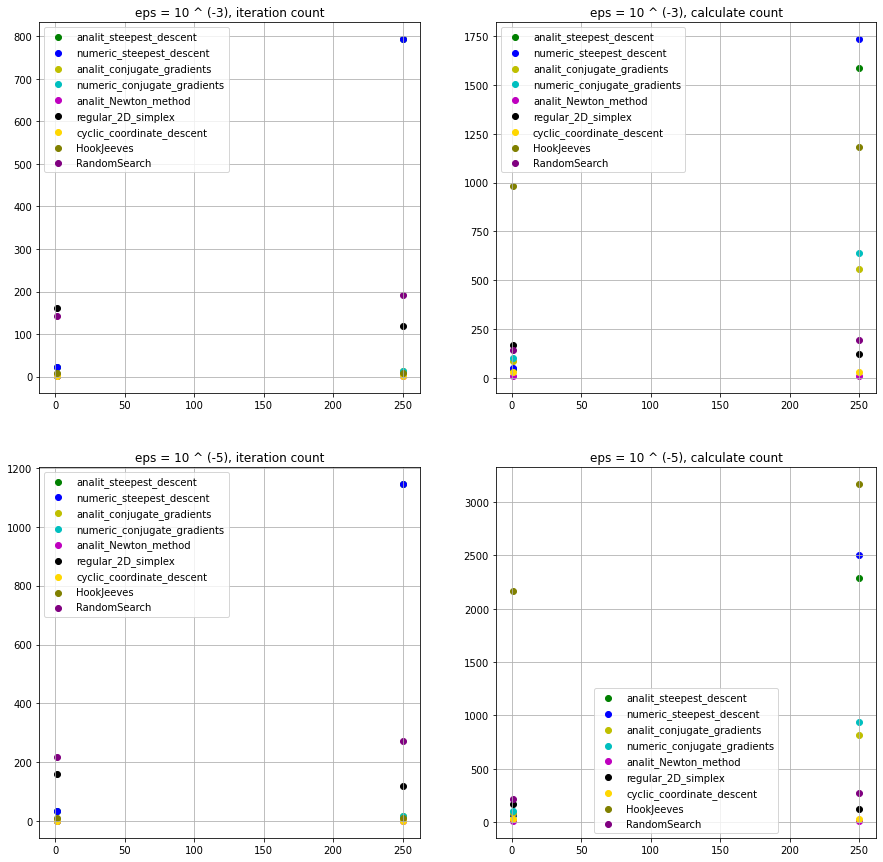

In [18]:
#Task-1 (gully function)
a_array   = np.array([1.0, 250.0])
eps_array = np.array([10.0 ** (-3.0), 10.0 ** (-5.0)])

eps_1D = 10 ** (-3)

def f(x):
    return x[0] ** 2.0 + a * x[1] ** 2.0
def df(x):
    return [2.0 * x[0], 2.0 * a * x[1]]
def d2fdx2(x):
    return 2.0
def d2fdy2(x):
    return 2.0 * a
def d2fdxdy(x):
    return 0.0

start_dot = np.array([5,5])

fig, ax = plt.subplots(2, 2, figsize=(15, 15))
i = 0
for eps in eps_array:
    ax[i, 0].grid()
    ax[i, 1].grid()
    for a in a_array:
        area = (10 * np.random.rand(10))**2
        
        best_x_asd, best_f_asd, asd_i, asd_c = analit_steepest_descent(f, df, eps, start_dot, eps_1D)
        best_x_nsd, best_f_nsd, nsd_i, nsd_c = numeric_steepest_descent(f, eps, start_dot, eps_1D)
        best_x_acg, best_f_acg, acg_i, acg_c = analit_conjugate_gradients(f, df, eps, start_dot, eps_1D)
        best_x_ncg, best_f_ncg, ncg_i, ncg_c = numeric_conjugate_gradients(f, eps, start_dot, eps_1D)
        best_x_anm, best_f_anm, anm_i, anm_c = analit_Newton_method(f, df, d2fdx2, d2fdy2, d2fdxdy, eps, start_dot)
        best_x_sim, best_f_sim, sim_i, sim_c = regular_2D_simplex(f, 10 ** (-2), start_dot, 0.1)
        best_x_ccd, best_f_ccd, ccd_i, ccd_c = cyclic_coordinate_descent(f, eps, start_dot, 10 ** 2, -5, 5, eps_1D)
        best_x_hjm, best_f_hjm, hjm_i, hjm_c = HookJeeves(f, eps, start_dot, np.array([1, 1]), 4)
        best_x_rsm, best_f_rsm, rsm_i, rsm_c = RandomSearch(f, eps, 2, 2, 10, start_dot)
        
        if (i == 0):
            ax[i, 0].scatter(a, asd_i, c = 'g')
            ax[i, 0].scatter(a, nsd_i, c = 'b')
            ax[i, 0].scatter(a, acg_i, c = 'y')
            ax[i, 0].scatter(a, ncg_i, c = 'c')
            ax[i, 0].scatter(a, anm_i, c = 'm')
            ax[i, 0].scatter(a, sim_i, c = 'k')
            ax[i, 0].scatter(a, ccd_i, c = 'gold')
            ax[i, 0].scatter(a, hjm_i, c = 'olive')
            ax[i, 0].scatter(a, rsm_i, c = 'purple')
            ax[i, 1].scatter(a, asd_c, c = 'g')
            ax[i, 1].scatter(a, nsd_c, c = 'b')
            ax[i, 1].scatter(a, acg_c, c = 'y')
            ax[i, 1].scatter(a, ncg_c, c = 'c')
            ax[i, 1].scatter(a, anm_c, c = 'm')
            ax[i, 1].scatter(a, sim_c, c = 'k')
            ax[i, 1].scatter(a, ccd_c, c = 'gold')
            ax[i, 1].scatter(a, hjm_c, c = 'olive')
            ax[i, 1].scatter(a, rsm_c, c = 'purple')
        else:
            ax[i, 0].scatter(a, asd_i, c = 'g')
            ax[i, 0].scatter(a, nsd_i, c = 'b')
            ax[i, 0].scatter(a, acg_i, c = 'y')
            ax[i, 0].scatter(a, ncg_i, c = 'c')
            ax[i, 0].scatter(a, anm_i, c = 'm')
            ax[i, 0].scatter(a, sim_i, c = 'k')
            ax[i, 0].scatter(a, ccd_i, c = 'gold')
            ax[i, 0].scatter(a, hjm_i, c = 'olive')
            ax[i, 0].scatter(a, rsm_i, c = 'purple')
            ax[i, 1].scatter(a, asd_c, c = 'g')
            ax[i, 1].scatter(a, nsd_c, c = 'b')
            ax[i, 1].scatter(a, acg_c, c = 'y')
            ax[i, 1].scatter(a, ncg_c, c = 'c')
            ax[i, 1].scatter(a, anm_c, c = 'm')
            ax[i, 1].scatter(a, sim_c, c = 'k')
            ax[i, 1].scatter(a, ccd_c, c = 'gold')
            ax[i, 1].scatter(a, hjm_c, c = 'olive')
            ax[i, 1].scatter(a, rsm_c, c = 'purple')
            
        print('analit_steepest_descent: \n', best_x_asd, best_f_asd, asd_i, asd_c)
        print('numeric_steepest_descent: \n', best_x_nsd, best_f_nsd, nsd_i, nsd_c)
        print('analit_conjugate_gradients: \n', best_x_acg, best_f_acg, acg_i, acg_c)
        print('numeric_conjugate_gradients: \n', best_x_ncg, best_f_ncg, ncg_i, ncg_c)
        print('analit_Newton_method: \n', best_x_anm, best_f_anm, anm_i, anm_c)
        print('regular_2D_simplex: \n', best_x_sim, best_f_sim, sim_i, sim_c)
        print('cyclic_coordinate_descent: \n', best_x_ccd, best_f_ccd, ccd_i, ccd_c)
        print('HookJeeves: \n', best_x_hjm, best_f_hjm, hjm_i, hjm_c)
        print('RandomSearch: \n', best_x_rsm, best_f_rsm, rsm_i, rsm_c)
        print('--------------------')
    ax[i, 0].legend(labels = ['analit_steepest_descent', 'numeric_steepest_descent', 'analit_conjugate_gradients', 'numeric_conjugate_gradients', 'analit_Newton_method', 'regular_2D_simplex', 'cyclic_coordinate_descent', 'HookJeeves', 'RandomSearch'])
    ax[i, 1].legend(labels = ['analit_steepest_descent', 'numeric_steepest_descent', 'analit_conjugate_gradients', 'numeric_conjugate_gradients', 'analit_Newton_method', 'regular_2D_simplex', 'cyclic_coordinate_descent', 'HookJeeves', 'RandomSearch'])
    i += 1
ax[0, 0].set_title('eps = 10 ^ (-3), iteration count')
ax[0, 1].set_title('eps = 10 ^ (-3), calculate count')
ax[1, 0].set_title('eps = 10 ^ (-5), iteration count')
ax[1, 1].set_title('eps = 10 ^ (-5), calculate count')

analit_steepest_descent: 
 [-10.70370785  10.96287039] -1417.1618673412788 1036 2071
numeric_steepest_descent: 
 [-10.70370854  10.9628711 ] -1417.1618673420203 1036 2213
analit_conjugate_gradients: 
 [-10.70375371  10.96291566] -1417.1618673647051 12 613
numeric_conjugate_gradients: 
 [-10.70375161  10.96291392] -1417.1618673647424 12 689
analit_Newton_method: 
 [-10.70375218  10.96291449] -1417.1618673647445 2 10
regular_2D_simplex: 
 [-8.33333333  8.6373067 ] -1350.6203349052519 435 441
cyclic_coordinate_descent: 
 [8.81465912e-05 5.90139619e-01] -63.55631426891736 1 36
HookJeeves: 
 1 1 1 1
RandomSearch: 
 [-4.93061456  5.22602458] -1019.4687119097374 201 201


Text(0.5, 1.0, 'calculate count')

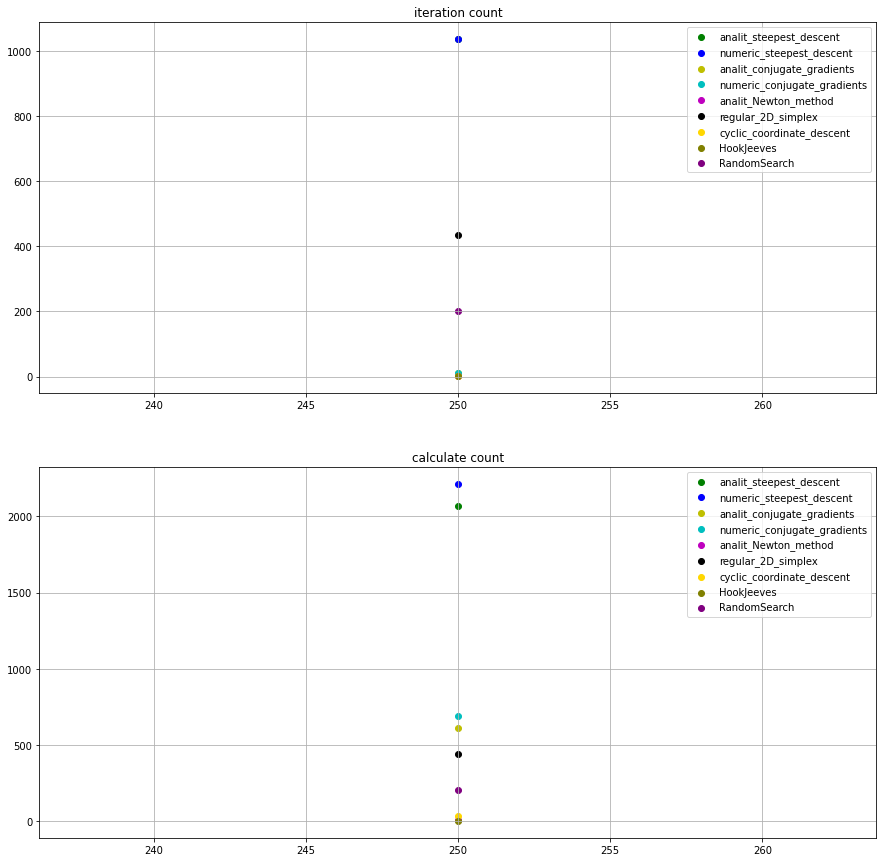

In [40]:
#Task-2 (my function)
eps = 10.0 ** (-3.0)
eps_1D = 10 ** (-4.0)

def f(x):
    return 194.0 * x[0] ** 2 + 376.0 * x[0] * x[1] + 194.0 * x[1] ** 2.0 + 31.0 * x[0] - 229.0 * x[1] + 4.0
def df(x):
    return [388.0 * x[0] + 376.0 * x[1] + 31.0, 376.0 * x[0] +  388.0 * x[1] - 229.0]
def d2fdx2(x):
    return 388.0
def d2fdy2(x):
    return 388.0
def d2fdxdy(x):
    return 376.0

start_dot = np.array([5,5])

fig, ax = plt.subplots(2, 1, figsize=(15,15))

ax[0].grid()
ax[1].grid()

best_x_asd, best_f_asd, asd_i, asd_c = analit_steepest_descent(f, df, eps, start_dot, eps_1D)
best_x_nsd, best_f_nsd, nsd_i, nsd_c = numeric_steepest_descent(f, eps, start_dot, eps_1D)
best_x_acg, best_f_acg, acg_i, acg_c = analit_conjugate_gradients(f, df, eps, start_dot, eps_1D)
best_x_ncg, best_f_ncg, ncg_i, ncg_c = numeric_conjugate_gradients(f, eps, start_dot, eps_1D)
best_x_anm, best_f_anm, anm_i, anm_c = analit_Newton_method(f, df, d2fdx2, d2fdy2, d2fdxdy, eps, start_dot)
best_x_sim, best_f_sim, sim_i, sim_c = regular_2D_simplex(f, 10 ** (-1), start_dot, 0.1)
best_x_ccd, best_f_ccd, ccd_i, ccd_c = cyclic_coordinate_descent(f, eps, start_dot, 10 ** 6, -5, 5, eps_1D)
best_x_hjm, best_f_hjm, hjm_i, hjm_c = HookJeeves(f, eps, start_dot, np.array([0.1, 0.1]), 2)
best_x_rsm, best_f_rsm, rsm_i, rsm_c = RandomSearch(f, eps, 2, 2, 10, start_dot)

ax[0].scatter(a, asd_i, c = 'g')
ax[0].scatter(a, nsd_i, c = 'b')
ax[0].scatter(a, acg_i, c = 'y')
ax[0].scatter(a, ncg_i, c = 'c')
ax[0].scatter(a, anm_i, c = 'm')
ax[0].scatter(a, sim_i, c = 'k')
ax[0].scatter(a, ccd_i, c = 'gold')
ax[0].scatter(a, hjm_i, c = 'olive')
ax[0].scatter(a, rsm_i, c = 'purple')

ax[1].scatter(a, asd_c, c = 'g')
ax[1].scatter(a, nsd_c, c = 'b')
ax[1].scatter(a, acg_c, c = 'y')
ax[1].scatter(a, ncg_c, c = 'c')
ax[1].scatter(a, anm_c, c = 'm')
ax[1].scatter(a, sim_c, c = 'k')
ax[1].scatter(a, ccd_c, c = 'gold')
ax[1].scatter(a, hjm_c, c = 'olive')
ax[1].scatter(a, rsm_c, c = 'purple')

ax[0].legend(labels = ['analit_steepest_descent', 'numeric_steepest_descent', 'analit_conjugate_gradients', 'numeric_conjugate_gradients', 'analit_Newton_method', 'regular_2D_simplex', 'cyclic_coordinate_descent', 'HookJeeves', 'RandomSearch'])
ax[1].legend(labels = ['analit_steepest_descent', 'numeric_steepest_descent', 'analit_conjugate_gradients', 'numeric_conjugate_gradients', 'analit_Newton_method', 'regular_2D_simplex', 'cyclic_coordinate_descent', 'HookJeeves', 'RandomSearch'])

print('analit_steepest_descent: \n', best_x_asd, best_f_asd, asd_i, asd_c)
print('numeric_steepest_descent: \n', best_x_nsd, best_f_nsd, nsd_i, nsd_c)
print('analit_conjugate_gradients: \n', best_x_acg, best_f_acg, acg_i, acg_c)
print('numeric_conjugate_gradients: \n', best_x_ncg, best_f_ncg, ncg_i, ncg_c)
print('analit_Newton_method: \n', best_x_anm, best_f_anm, anm_i, anm_c)
print('regular_2D_simplex: \n', best_x_sim, best_f_sim, sim_i, sim_c)
print('cyclic_coordinate_descent: \n', best_x_ccd, best_f_ccd, ccd_i, ccd_c)
print('HookJeeves: \n', best_x_hjm, best_f_hjm, hjm_i, hjm_c)
print('RandomSearch: \n', best_x_rsm, best_f_rsm, rsm_i, rsm_c)

ax[0].set_title('iteration count')
ax[1].set_title('calculate count')

analit_steepest_descent: 
 [1 1] 0.0 1 1
numeric_steepest_descent: 
 [0.99960047 0.99927952] 7.745995019882155e-07 1000000 2095241
analit_conjugate_gradients: 
 [1 1] 0.0 0 1
numeric_conjugate_gradients: 
 [-1.09559151e+40 -1.29357129e+40] 1.4407699100615298e+162 66 4559
analit_Newton_method: 
 [1 1] 0.0 1 5
regular_2D_simplex: 
 [1.01666667 1.02886751] 0.0025279496458326506 3 10
cyclic_coordinate_descent: 
 [-0.99497471  0.9899748 ] 3.9799241003855235 1 50
HookJeeves: 
 1 1 1 1
RandomSearch: 
 [1 1] 0.0 121 121
--------------------
analit_steepest_descent: 
 [1 1] 0.0 1 1
numeric_steepest_descent: 
 [0.99960047 0.99927952] 7.745995019882155e-07 1000000 2095241
analit_conjugate_gradients: 
 [1 1] 0.0 0 1
numeric_conjugate_gradients: 
 [-1.09559151e+40 -1.29357129e+40] 1.4407699100615298e+162 66 4559
analit_Newton_method: 
 [1 1] 0.0 1 5
regular_2D_simplex: 
 [1.01666667 1.02886751] 0.0025279496458326506 3 10
cyclic_coordinate_descent: 
 [-0.99497471  0.9899748 ] 3.9799241003855235 1 50

Text(0.5, 1.0, 'eps = 10 ^ (-5), calculate count')

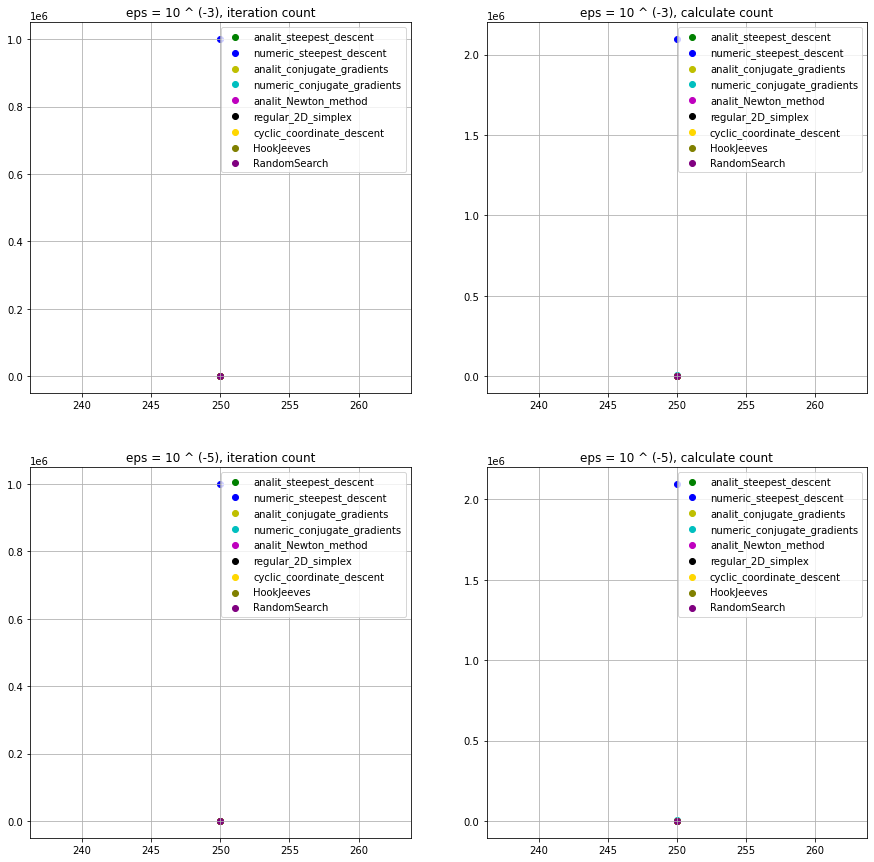

In [41]:
#Task-3 (Rosenbrock function)
start_dot = np.array([[1,1]])
eps_array = np.array([10.0 ** (-3.0), 10.0 ** (-5.0)])

eps_1D = 10 ** (-6.0)

def f(x):
    return 100.0 * (x[0] ** 2.0 - x[1]) ** 2 + (x[0] - 1) ** 2
def df(x):
    return [400.0 * (x[0] ** 3 - x[0] * x[1]) + 2.0 * (x[0] -1), 200.0 * (x[1] - x[0] ** 2)]
def d2fdx2(x):
    return 1200.0 * x[0] ** 2 - 400.0 * x[1] + 2
def d2fdy2(x):
    return 200.0
def d2fdxdy(x):
    return - 400.0 * x[0]

fig, ax = plt.subplots(2, 2, figsize=(15,15))
i = 0
for eps in eps_array:
    ax[i, 0].grid()
    ax[i, 1].grid()
    for s in range(len(start_dot[:, 0])):
        
        best_x_asd, best_f_asd, asd_i, asd_c = analit_steepest_descent(f, df, eps, start_dot[s, :], eps_1D)
        best_x_nsd, best_f_nsd, nsd_i, nsd_c = numeric_steepest_descent(f, eps, start_dot[s, :], eps_1D)
        best_x_acg, best_f_acg, acg_i, acg_c = analit_conjugate_gradients(f, df, eps, start_dot[s, :], eps_1D)
        best_x_ncg, best_f_ncg, ncg_i, ncg_c = numeric_conjugate_gradients(f, eps, start_dot[s, :], eps_1D)
        best_x_anm, best_f_anm, anm_i, anm_c = analit_Newton_method(f, df, d2fdx2, d2fdy2, d2fdxdy, eps, start_dot[s, :])
        best_x_sim, best_f_sim, sim_i, sim_c = regular_2D_simplex(f, 10 ** (-1), start_dot[s, :], 0.1)
        best_x_ccd, best_f_ccd, ccd_i, ccd_c = cyclic_coordinate_descent(f, eps, start_dot[s, :], 10 ** 6, 0, 100, eps_1D)
        best_x_hjm, best_f_hjm, hjm_i, hjm_c = HookJeeves(f, eps, start_dot[s, :], np.array([1, 1]), 2)
        best_x_rsm, best_f_rsm, rsm_i, rsm_c = RandomSearch(f, eps, 2, 2, 10, start_dot[s, :])
        
        if (i == 0):
            ax[i, 0].scatter(a, asd_i, c = 'g')
            ax[i, 0].scatter(a, nsd_i, c = 'b')
            ax[i, 0].scatter(a, acg_i, c = 'y')
            ax[i, 0].scatter(a, ncg_i, c = 'c')
            ax[i, 0].scatter(a, anm_i, c = 'm')
            ax[i, 0].scatter(a, sim_i, c = 'k')
            ax[i, 0].scatter(a, ccd_i, c = 'gold')
            ax[i, 0].scatter(a, hjm_i, c = 'olive')
            ax[i, 0].scatter(a, rsm_i, c = 'purple')
            ax[i, 1].scatter(a, asd_c, c = 'g')
            ax[i, 1].scatter(a, nsd_c, c = 'b')
            ax[i, 1].scatter(a, acg_c, c = 'y')
            ax[i, 1].scatter(a, ncg_c, c = 'c')
            ax[i, 1].scatter(a, anm_c, c = 'm')
            ax[i, 1].scatter(a, sim_c, c = 'k')
            ax[i, 1].scatter(a, ccd_c, c = 'gold')
            ax[i, 1].scatter(a, hjm_c, c = 'olive')
            ax[i, 1].scatter(a, rsm_c, c = 'purple')
        else:
            ax[i, 0].scatter(a, asd_i, c = 'g')
            ax[i, 0].scatter(a, nsd_i, c = 'b')
            ax[i, 0].scatter(a, acg_i, c = 'y')
            ax[i, 0].scatter(a, ncg_i, c = 'c')
            ax[i, 0].scatter(a, anm_i, c = 'm')
            ax[i, 0].scatter(a, sim_i, c = 'k')
            ax[i, 0].scatter(a, ccd_i, c = 'gold')
            ax[i, 0].scatter(a, hjm_i, c = 'olive')
            ax[i, 0].scatter(a, rsm_i, c = 'purple')
            ax[i, 1].scatter(a, asd_c, c = 'g')
            ax[i, 1].scatter(a, nsd_c, c = 'b')
            ax[i, 1].scatter(a, acg_c, c = 'y')
            ax[i, 1].scatter(a, ncg_c, c = 'c')
            ax[i, 1].scatter(a, anm_c, c = 'm')
            ax[i, 1].scatter(a, sim_c, c = 'k')
            ax[i, 1].scatter(a, ccd_c, c = 'gold')
            ax[i, 1].scatter(a, hjm_c, c = 'olive')
            ax[i, 1].scatter(a, rsm_c, c = 'purple')
            
        print('analit_steepest_descent: \n', best_x_asd, best_f_asd, asd_i, asd_c)
        print('numeric_steepest_descent: \n', best_x_nsd, best_f_nsd, nsd_i, nsd_c)
        print('analit_conjugate_gradients: \n', best_x_acg, best_f_acg, acg_i, acg_c)
        print('numeric_conjugate_gradients: \n', best_x_ncg, best_f_ncg, ncg_i, ncg_c)
        print('analit_Newton_method: \n', best_x_anm, best_f_anm, anm_i, anm_c)
        print('regular_2D_simplex: \n', best_x_sim, best_f_sim, sim_i, sim_c)
        print('cyclic_coordinate_descent: \n', best_x_ccd, best_f_ccd, ccd_i, ccd_c)
        print('HookJeeves: \n', best_x_hjm, best_f_hjm, hjm_i, hjm_c)
        print('RandomSearch: \n', best_x_rsm, best_f_rsm, rsm_i, rsm_c)
        print('--------------------')
    ax[i, 0].legend(labels = ['analit_steepest_descent', 'numeric_steepest_descent', 'analit_conjugate_gradients', 'numeric_conjugate_gradients', 'analit_Newton_method', 'regular_2D_simplex', 'cyclic_coordinate_descent', 'HookJeeves', 'RandomSearch'])
    ax[i, 1].legend(labels = ['analit_steepest_descent', 'numeric_steepest_descent', 'analit_conjugate_gradients', 'numeric_conjugate_gradients', 'analit_Newton_method', 'regular_2D_simplex', 'cyclic_coordinate_descent', 'HookJeeves', 'RandomSearch'])
    i += 1
ax[0, 0].set_title('eps = 10 ^ (-3), iteration count')
ax[0, 1].set_title('eps = 10 ^ (-3), calculate count')
ax[1, 0].set_title('eps = 10 ^ (-5), iteration count')
ax[1, 1].set_title('eps = 10 ^ (-5), calculate count')

analit_steepest_descent: 
 [2.99999203 2.00001145] 2.7518031934305623e-09 274 547
numeric_steepest_descent: 
 [2.99999293 2.00000146] 1.6799469625048928e-09 102586 214945
analit_conjugate_gradients: 
 [-2.17103235e+210  9.05355226e+209] inf 183 11530
numeric_conjugate_gradients: 
 [-5.60375808e+27  8.45413502e+26] 9.866030047322722e+110 147 10148
analit_Newton_method: 
 [2.98172854 0.68939809] 14.568968371193872 1000000 5000000
regular_2D_simplex: 
 [3.01666667 1.99185843] 0.008739774989341843 92 99
cyclic_coordinate_descent: 
 1 1 1 1
HookJeeves: 
 1 1 1 1
RandomSearch: 
 [3.00009875 1.99944406] 4.515763654223651e-06 139 139
--------------------
analit_steepest_descent: 
 [ 3.58442765 -1.84810958] 4.1555911407719736e-09 190 379
numeric_steepest_descent: 
 [ 3.58441273 -1.84806601] 5.990496920780034e-08 211 445
analit_conjugate_gradients: 
 [nan nan] nan 555 34966
numeric_conjugate_gradients: 
 [-1.36077180e+44 -1.38292637e+43] 3.429158220490062e+176 813 56102
analit_Newton_method: 
 [

Text(0.5, 1.0, 'eps = 10 ^ (-3), calculate count')

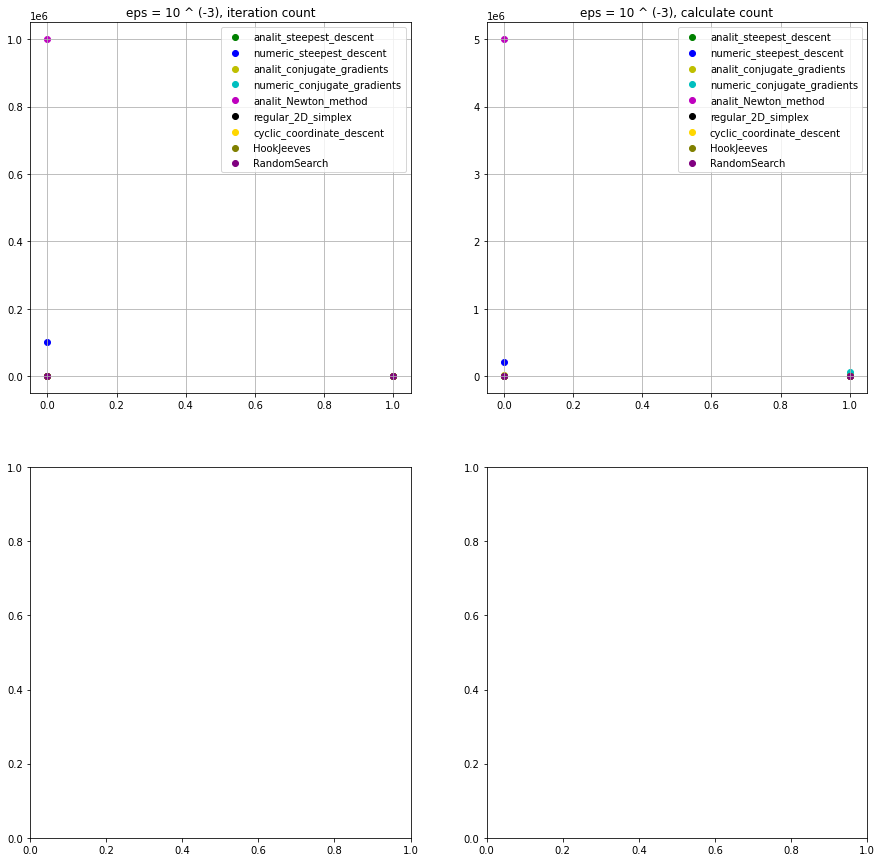

In [20]:
#Test-4 (Hemmenblau function)
start_dot = np.array([[0,0], [-5, 0]])
eps_array = np.array([10.0 ** (-3.0)])

eps_1D = 10 ** (-6.0)

def f(x):
    return (x[0] ** 2 + x[1] - 11) ** 2 + (x[0] + x[1] ** 2 - 7) ** 2
def df(x):
    return [2.0 *(x[0] ** 2 + x[1] - 11) * 2.0 * x[0] + 2.0 * (x[0] + x[1] ** 2 - 7) , 2.0 * (x[0] ** 2 + x[1] - 11) + 2.0 * (x[0] + x[1] ** 2 - 7) * 2.0 * x[1]]
def d2fdx2(x):
    return 4.0 * (3.0 * x[0] ** 2 + x[1] - 11) + 2.0
def d2fdy2(x):
    return 2.0 + 4.0 * x[0] + 12.0 * x[1] ** 2 - 28.0
def d2fdxdy(x):
    return 4.0 * x[0] + 4.0 * x[1]

fig, ax = plt.subplots(2, 2, figsize=(15,15))
i = 0
for eps in eps_array:
    ax[i, 0].grid()
    ax[i, 1].grid()
    for s in range(len(start_dot[:, 0])):
        
        best_x_asd, best_f_asd, asd_i, asd_c = analit_steepest_descent(f, df, eps, start_dot[s, :], eps_1D)
        best_x_nsd, best_f_nsd, nsd_i, nsd_c = numeric_steepest_descent(f, eps, start_dot[s, :], eps_1D)
        best_x_acg, best_f_acg, acg_i, acg_c = analit_conjugate_gradients(f, df, eps, start_dot[s, :], eps_1D)
        best_x_ncg, best_f_ncg, ncg_i, ncg_c = numeric_conjugate_gradients(f, eps, start_dot[s, :], eps_1D)
        best_x_anm, best_f_anm, anm_i, anm_c = analit_Newton_method(f, df, d2fdx2, d2fdy2, d2fdxdy, eps, start_dot[s, :])
        best_x_sim, best_f_sim, sim_i, sim_c = regular_2D_simplex(f, 10 ** (-1), start_dot[s, :], 0.1)
        best_x_ccd, best_f_ccd, ccd_i, ccd_c = cyclic_coordinate_descent(f, eps, start_dot[s, :], 10 ** 6, 0, 100, eps_1D)
        best_x_hjm, best_f_hjm, hjm_i, hjm_c = HookJeeves(f, eps, start_dot[s, :], np.array([1, 1]), 2)
        best_x_rsm, best_f_rsm, rsm_i, rsm_c = RandomSearch(f, eps, 2, 2, 10, start_dot[s, :])
        
        if (i == 0):
            ax[i, 0].scatter(s, asd_i, c = 'g')
            ax[i, 0].scatter(s, nsd_i, c = 'b')
            ax[i, 0].scatter(s, acg_i, c = 'y')
            ax[i, 0].scatter(s, ncg_i, c = 'c')
            ax[i, 0].scatter(s, anm_i, c = 'm')
            ax[i, 0].scatter(s, sim_i, c = 'k')
            ax[i, 0].scatter(s, ccd_i, c = 'gold')
            ax[i, 0].scatter(s, hjm_i, c = 'olive')
            ax[i, 0].scatter(s, rsm_i, c = 'purple')
            ax[i, 1].scatter(s, asd_c, c = 'g')
            ax[i, 1].scatter(s, nsd_c, c = 'b')
            ax[i, 1].scatter(s, acg_c, c = 'y')
            ax[i, 1].scatter(s, ncg_c, c = 'c')
            ax[i, 1].scatter(s, anm_c, c = 'm')
            ax[i, 1].scatter(s, sim_c, c = 'k')
            ax[i, 1].scatter(s, ccd_c, c = 'gold')
            ax[i, 1].scatter(s, hjm_c, c = 'olive')
            ax[i, 1].scatter(s, rsm_c, c = 'purple')
        else:
            ax[i, 0].scatter(s, asd_i, c = 'g')
            ax[i, 0].scatter(s, nsd_i, c = 'b')
            ax[i, 0].scatter(s, acg_i, c = 'y')
            ax[i, 0].scatter(s, ncg_i, c = 'c')
            ax[i, 0].scatter(s, anm_i, c = 'm')
            ax[i, 0].scatter(s, sim_i, c = 'k')
            ax[i, 0].scatter(s, ccd_i, c = 'gold')
            ax[i, 0].scatter(s, hjm_i, c = 'olive')
            ax[i, 0].scatter(s, rsm_i, c = 'purple')
            ax[i, 1].scatter(s, asd_c, c = 'g')
            ax[i, 1].scatter(s, nsd_c, c = 'b')
            ax[i, 1].scatter(s, acg_c, c = 'y')
            ax[i, 1].scatter(s, ncg_c, c = 'c')
            ax[i, 1].scatter(s, anm_c, c = 'm')
            ax[i, 1].scatter(s, sim_c, c = 'k')
            ax[i, 1].scatter(s, ccd_c, c = 'gold')
            ax[i, 1].scatter(s, hjm_c, c = 'olive')
            ax[i, 1].scatter(s, rsm_c, c = 'purple')
            
        print('analit_steepest_descent: \n', best_x_asd, best_f_asd, asd_i, asd_c)
        print('numeric_steepest_descent: \n', best_x_nsd, best_f_nsd, nsd_i, nsd_c)
        print('analit_conjugate_gradients: \n', best_x_acg, best_f_acg, acg_i, acg_c)
        print('numeric_conjugate_gradients: \n', best_x_ncg, best_f_ncg, ncg_i, ncg_c)
        print('analit_Newton_method: \n', best_x_anm, best_f_anm, anm_i, anm_c)
        print('regular_2D_simplex: \n', best_x_sim, best_f_sim, sim_i, sim_c)
        print('cyclic_coordinate_descent: \n', best_x_ccd, best_f_ccd, ccd_i, ccd_c)
        print('HookJeeves: \n', best_x_hjm, best_f_hjm, hjm_i, hjm_c)
        print('RandomSearch: \n', best_x_rsm, best_f_rsm, rsm_i, rsm_c)
        print('--------------------')
    ax[i, 0].legend(labels = ['analit_steepest_descent', 'numeric_steepest_descent', 'analit_conjugate_gradients', 'numeric_conjugate_gradients', 'analit_Newton_method', 'regular_2D_simplex', 'cyclic_coordinate_descent', 'HookJeeves', 'RandomSearch'])
    ax[i, 1].legend(labels = ['analit_steepest_descent', 'numeric_steepest_descent', 'analit_conjugate_gradients', 'numeric_conjugate_gradients', 'analit_Newton_method', 'regular_2D_simplex', 'cyclic_coordinate_descent', 'HookJeeves', 'RandomSearch'])
    i += 1
ax[0, 0].set_title('eps = 10 ^ (-3), iteration count')
ax[0, 1].set_title('eps = 10 ^ (-3), calculate count')